## Manifesto in Color

by [Lynne Yun](http://www.lynneyun.com)

Let's try to convert manifesto text to a colorful piece of art!


The following was adapted from Allison's 'Letters as Numbers' class demo.
I decided to adapt the example where the text was getting converted to bytes, then to colors. 

Pillow, used above, uses 3 x 8 bit pixels in the 'RGB' mode within the '.frombytes' function, as shown here.
https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.frombytes

In other words, Pillow takes in 3 bytes (each 8 bits) and shows the color. In other words, 'hello', which is expressed in 5 bytes as '104-101-108-108-111', is shown as ONE COLOR (and presumably the next letter would get mixed in with the next color). 

## Challenge: Have the bytes (per letter) correspond to one pixel each, and have the rest of the values be customizable.

So for instance using the same example, I would like 'hello' to be expressed in 5 pixels. Now, I do realize that Pillow requires 3 bytes of information. My solution to this is that whatever info its missing just gets a predetermined number.

Here are reviews of notes taken from Allison's demo.

In [226]:
#Every glyph contains an encoded value that translates as numerals.
#We can see this in this example of an 'a'

ord(' ')

32

In [227]:
# we can also convert numerals to chars

chr(126)

'~'

For this project, I wrote a short manifesto.

In [228]:
#Let's print out the original text for us to read first.
original_text = open("manifesto.txt").read()
print(original_text)

I believe that all letterforms are powerful and powerless at the same time.
I believe that all letterforms can be flexible in its form as long as the recipients agree on its format.
I believe that no letterform is inherently good nor inherently bad.
Letterforms are the foundations of communication but can also dismantle communication.
The love for letterforms should be without boundaries.


In [229]:
#Opening a text file that contains the 'manifesto' document, and reading it as bytes

text_bytes = open("manifesto.txt", "rb").read()

In [230]:
#import Pillow which enables the bytes to image conversion

from PIL import Image, ImageOps, ImageFilter

In [231]:
# Pillow can only take bytes, not strings. so let's see what bytes make up manifesto
# Sample taken from https://stackoverflow.com/questions/7585435/best-way-to-convert-string-to-bytes-in-python-3

# for i in range(0,len(original_text)):
#     print(bytes(original_text[i], 'utf8'))

## Here is the first attempt, a version where you can add glyphs as padding. (markdown so it's not enabled)

### FYI, this failed because inputting glyphs has a limited value (up to 127), and RGB color range is 0~255


green_default = '~'
blue_default = ' '

alt_text = ''
for i in range(0,len(original_text)):
    # Add original character to new string
    alt_text += original_text[i]
    
    # Pad bytes with green and blue defaults
    numbytes = len(bytes(original_text[i], 'utf8'))
    if numbytes == 1:
        alt_text += green_default + blue_default
    elif numbytes == 2:
        alt_text += blue_default
    
print(alt_text)


## Final Version, where you can customize Green and Blue values

For this, I recieved help from Kevin (Yeh)!

Turns out I had my head mixed up in what bytes exactly where, and couldn't get the 'conversion' in my head

In [267]:
green_default = (150).to_bytes(1, byteorder='big')
blue_default = (250).to_bytes(1, byteorder='big')

alt_text = bytearray()
for i in range(0,len(original_text)):
    # Add original character to new string
    b = bytes(original_text[i], 'utf8')
    alt_text += b
    
    # Pad bytes with green and blue defaults
    numbytes = len(b)
    if numbytes == 1:
        alt_text += green_default
        alt_text += blue_default
    elif numbytes == 2:
        alt_text += blue_default
    
## Uncomment to see what alt_text looks like
## alt_text

In [268]:
#Adapted example from Allison.
#note: the 'padded' bytes are there so no data gets cut off. 
#It looks like black areas because there was no data there, therefore defaulting to 0 light value. 
# The height is calulated from the width and drawn.

width = 20
padded_text_bytes = alt_text + (b' ' * width * 3)
height = int ((len(padded_text_bytes)/3)/width)
new_img = Image.frombytes('RGB', (width, height), bytes(padded_text_bytes))

In [269]:
#Printing image
new_img

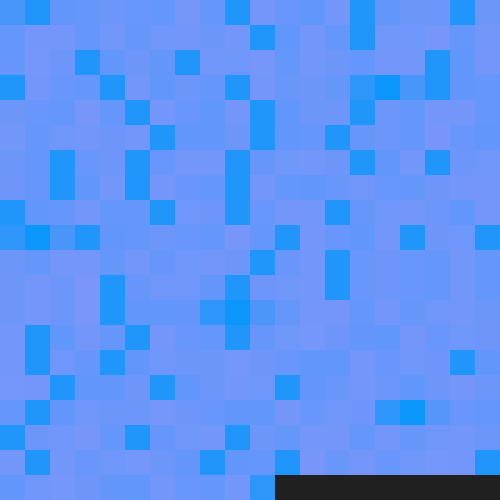

In [270]:
#magnifying it 

def show_scaled(img, scale=25):
    return img.resize((img.width*scale, img.height*scale))

show_scaled(new_img)

In [271]:
#downloading it
show_scaled(new_img).save("text_img.png")